# <b>1 <span style='color:#78D118'>|</span> Introduction</b>
![](http://www.isaaa.org/kc/cropbiotechupdate/files/images/9252019125259AM.jpg)

### What to Expect?
In this notebook I'm gonna be using Transfer Learning MobileNetv3 by Keras to make a classification model for our dataset.

### Dataset Overview
This dataset includes 5 different rice types images with 15000 images for every category. And our task is to make a classification model that could correctly predict the 5 kinds of rice.

#### Rice Types
* Arborio
* Basmati
* Ipsala
* Jasmine
* Karacadag

# <b>2 <span style='color:#78D118'>|</span> Preparing the Data</b>

**Importing necessary libraries**

In [30]:
# For building deep learning models
import tensorflow as tf 
from tensorflow import keras 
# For accessing pre-trained models
import tensorflow_hub as hub 
# For separating train and test sets
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2

import os
import numpy as np
import pathlib

**Preparing our dataset**

In [31]:
data_dir = "../Rice_Image_Dataset" # Datasets path
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('../Rice_Image_Dataset')

**Separating the categories**

In [32]:
arborio = list(data_dir.glob('Arborio/*'))[:1000]
basmati = list(data_dir.glob('Basmati/*'))[:1000]
ipsala = list(data_dir.glob('Ipsala/*'))[:1000]
jasmine = list(data_dir.glob('Jasmine/*'))[:1000]
karacadag = list(data_dir.glob('Karacadag/*'))[:1000]

**Checking samples**

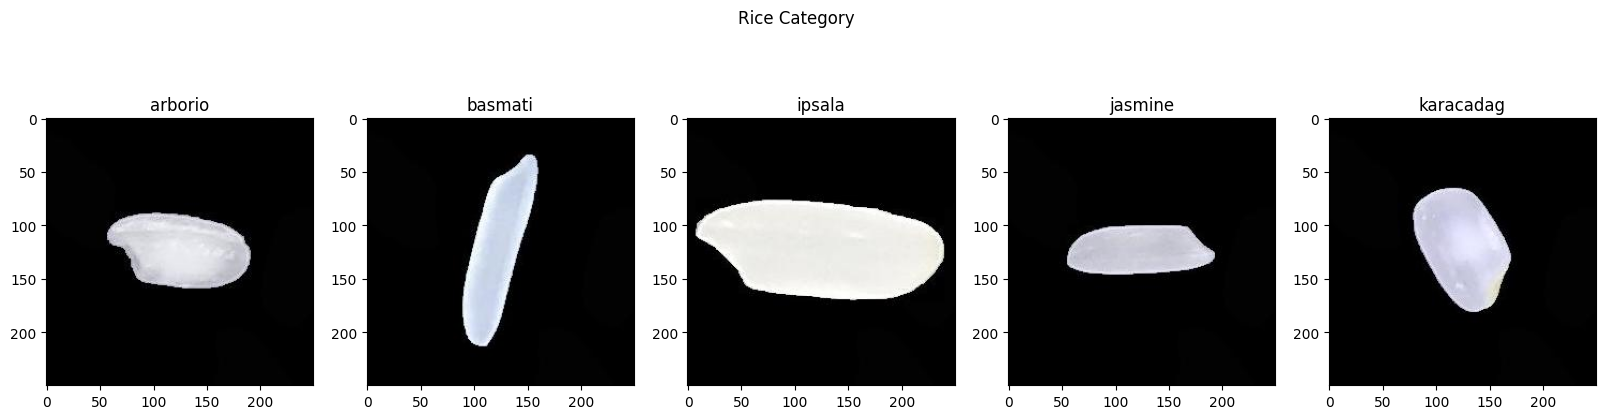

In [33]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category')
arborio_image = img.imread(arborio[0])
basmati_image = img.imread(basmati[0])
ipsala_image = img.imread(ipsala[0])
jasmine_image = img.imread(jasmine[0])
karacadag_image = img.imread(karacadag[0])

ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')


ax[0].imshow(arborio_image)
ax[1].imshow(basmati_image)
ax[2].imshow(ipsala_image)
ax[3].imshow(jasmine_image)
ax[4].imshow(karacadag_image)

**Assigning a separate dictionary for images and their corresponding labels**

In [34]:
# Contains the images path
df_images = {
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala' : ipsala,
    'jasmine' : jasmine,
    'karacadag': karacadag
}

# Contains numerical labels for the categories
df_labels = {
    'arborio' : 0,
    'basmati' : 1,
    'ipsala' : 2,
    'jasmine' : 3,
    'karacadag': 4
}

**Since we using mobilenet_v3_small_100_224 training images dimensions are 224 by 224 by 3, we have to reshape our categories into that**

In [35]:
img = cv2.imread(str(df_images['arborio'][0])) # Converting it into numerical arrays
img.shape # Its currently 250 by 250 by 3

(250, 250, 3)

In [36]:
X, y = [], [] # X = images, y = labels
for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224))
        X.append(resized_img) 
        y.append(df_labels[label])

**Splitting the data and standarization**

In [37]:
# Standarizing
X = np.array(X)
X = X/255
y = np.array(y)

In [38]:
# Separating data into training, test and validation sets
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

# <b>3 <span style='color:#78D118'>|</span> Creating the Model</b>

In [39]:
mobile_net = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5",
                   trainable=False),
    tf.keras.layers.Dense(5, activation='softmax')
])
mobile_net.build([None, 224, 224, 3])  # Batch input shape.

In [40]:
mobile_net.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1024)              1529968   
                                                                 
 dense_1 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 1,535,093
Trainable params: 5,125
Non-trainable params: 1,529,968
_________________________________________________________________


# <b>4 <span style='color:#78D118'>|</span> Training the Model</b>

In [41]:
mobile_net.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

history = mobile_net.fit(X_train, y_train, epochs=35, validation_data=(X_val, y_val))

Epoch 1/35
118/118 [==============================] - 131s 806ms/step - loss: 0.3786 - acc: 0.9181 - val_loss: 0.1145 - val_acc: 0.9872
Epoch 2/35
118/118 [==============================] - 45s 384ms/step - loss: 0.0884 - acc: 0.9877 - val_loss: 0.0812 - val_acc: 0.9904
Epoch 3/35
118/118 [==============================] - 42s 358ms/step - loss: 0.0590 - acc: 0.9888 - val_loss: 0.0536 - val_acc: 0.9904
Epoch 4/35
118/118 [==============================] - 42s 355ms/step - loss: 0.0455 - acc: 0.9907 - val_loss: 0.0519 - val_acc: 0.9904
Epoch 5/35
118/118 [==============================] - 42s 359ms/step - loss: 0.0379 - acc: 0.9920 - val_loss: 0.0443 - val_acc: 0.9936
Epoch 6/35
118/118 [==============================] - 44s 370ms/step - loss: 0.0326 - acc: 0.9931 - val_loss: 0.0366 - val_acc: 0.9936
Epoch 7/35
118/118 [==============================] - 44s 370ms/step - loss: 0.0288 - acc: 0.9936 - val_loss: 0.0331 - val_acc: 0.9936
Epoch 8/35
118/118 [==============================] - 

# <b>5 <span style='color:#78D118'>|</span> Evaluate the Model</b>

#### I've evaluated the model using accuracy, recall, precision and f1-score

In [42]:
mobile_net.evaluate(X_test,y_test)

30/30 [==============================] - 11s 367ms/step - loss: 0.0044 - acc: 1.0000


[0.004417022690176964, 1.0]

In [43]:
from sklearn.metrics import classification_report

y_pred = mobile_net.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

15/15 [==============================] - 40s 767ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       1.00      1.00      1.00       188
           2       1.00      1.00      1.00       192
           3       1.00      1.00      1.00       185
           4       1.00      1.00      1.00       188

    accuracy                           1.00       937
   macro avg       1.00      1.00      1.00       937
weighted avg       1.00      1.00      1.00       937



In [44]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
num_classes = 5
# Convert y_test and y_pred to one-hot encoded format
y_test_one_hot = label_binarize(y_test, classes=np.arange(num_classes))
y_pred_one_hot = label_binarize(y_pred_bool, classes=np.arange(num_classes))

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_one_hot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_one_hot.ravel(), y_pred_one_hot.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Print ROC AUC for each class
for i in range(num_classes):
    print(f"Class {i}: ROC AUC = {roc_auc[i]}")

# Print micro-average ROC AUC
print(f"Micro-average ROC AUC = {roc_auc_micro}")


Class 0: ROC AUC = 1.0
Class 1: ROC AUC = 1.0
Class 2: ROC AUC = 1.0
Class 3: ROC AUC = 1.0
Class 4: ROC AUC = 1.0
Micro-average ROC AUC = 1.0



#### Save the model

In [45]:
# save the model
mobile_net.save('mobilenet_v3.h5')

# <b>6 <span style='color:#78D118'>|</span> Visualizing the Model</b>
#### On how the models accuracy and loss changed through-out the 5 epochs

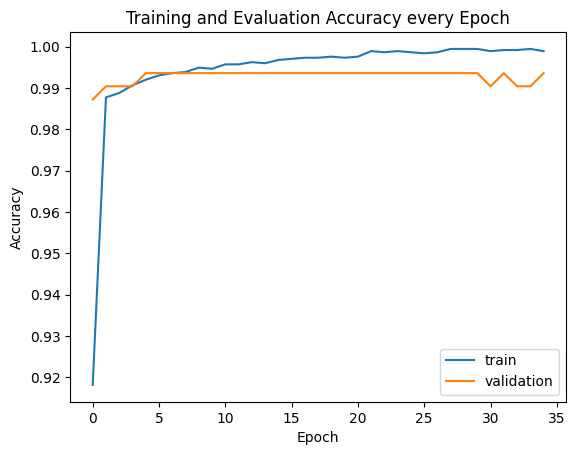

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

acc = pd.DataFrame({'train': history.history['acc'], 'val': history.history['val_acc']})
plt.plot(acc.index, acc['train'], label='train')
plt.plot(acc.index, acc['val'], label='validation')
plt.title('Training and Evaluation Accuracy every Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

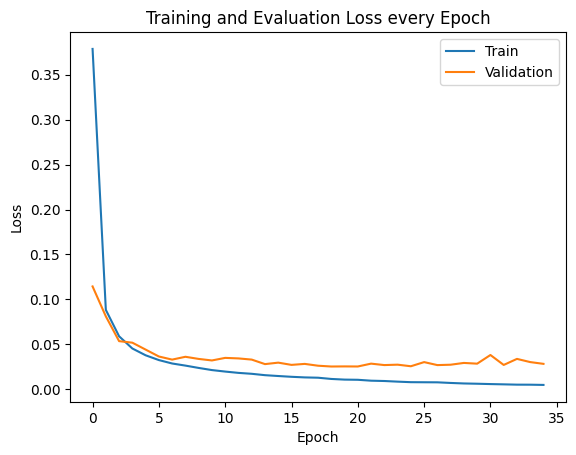

In [47]:
loss = pd.DataFrame({'train': history.history['loss'], 'val': history.history['val_loss']})

plt.plot(loss.index, loss['train'], label='Train')
plt.plot(loss.index, loss['val'], label='Validation')
plt.title('Training and Evaluation Loss every Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()